# Lab 1. Logistic Regression


  **Author:** *Gabriel Szewczyk*</br>
  **Date:** *16.03.2024*

import essential libraries




In [224]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
import warnings

### Function preparing

calculate predicted values by *h_fun*

In [225]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

compute cost by *calculate_cost* function

In [226]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

Matching a function to sample data

In [227]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

gradient descent algorithm

In [228]:
warnings.filterwarnings('ignore')
eps = 1e-7 # acceptable difference
#  in logistic regression key is to find good learning rate, 
# in sigmoidal function bigger rate found better match in this case
alpha = 1
theta = np.array([[0], [0]])
cost_before = 0
current_cost = 1000
count = 0
max_iterations = 1000000

while abs(cost_before - current_cost) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost(X, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / X.shape[-1]
    current_cost = calculate_cost(X, y, theta)
    count +=1
    if count > max_iterations:
        break
    

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost

number of iterations:  6126
Theta values: [-27.94306], [10.60333]
cost: nan


vizualize sample data

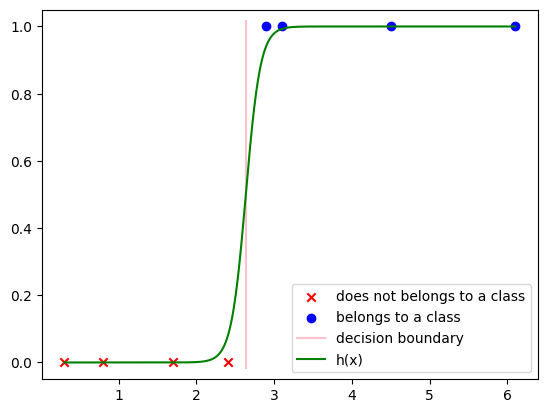

In [229]:
x_chart = np.vstack((np.ones((1, 1000)), np.linspace(np.min(X[1]), np.max(X[1]), 1000)))
y_chart = h_fun(x_chart, theta).T
X_0 = X[1][y.flatten() == 0]
X_1 = X[1][y.flatten() == 1]
plt.scatter(X_0, np.zeros_like(X_0), c='r', marker='x', label='does not belongs to a class')
plt.scatter(X_1, np.ones_like(X_1), c='b', marker='o', label='belongs to a class')
plt.axvline(x=-theta[0]/theta[1], color='pink', ymin=0.03, ymax=0.97, linestyle='-', label='decision boundary')
plt.plot(x_chart[1], y_chart, color='green', label='h(x)')
plt.legend()
plt.show()

### Admission dataset - linear fitting

read admission.txt file, validate size

In [230]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])

print(f'{X.shape=}')
print(f'{y.shape=}')


X.shape=(3, 100)
y.shape=(1, 100)


Visualize dataset

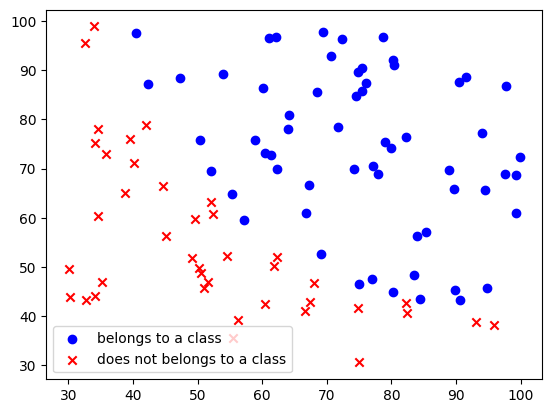

In [231]:
belongs = np.where(y[0] == 1)[0]
not_belongs = np.where(y[0] == 0)[0]
plt.scatter(X[1][belongs], X[2][belongs], color='blue', marker='o', label='belongs to a class')
plt.scatter(X[1][not_belongs], X[2][not_belongs], color='red', marker='x', label='does not belongs to a class')
plt.legend()
plt.show()

calculate gradient descent for this set

In [232]:
warnings.filterwarnings('ignore')
eps = 1e-7 # acceptable difference
#  in logistic regression key is to find good learning rate, 
# in sigmoidal function bigger rate found better match in this case
alpha = 0.005
theta = np.array([[0], [0], [0]])
cost_before = 0
current_cost = 1000
count = 0
max_iterations = 1000000 # essential to add there

while abs(cost_before - current_cost) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost(X, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / X.shape[-1]
    current_cost = calculate_cost(X, y, theta)
    count +=1
    if count > max_iterations: break

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost

number of iterations:  1000001
Theta values: [-29.99574], [0.25566]
cost: 0.24428


create decision boundary and fit to the data

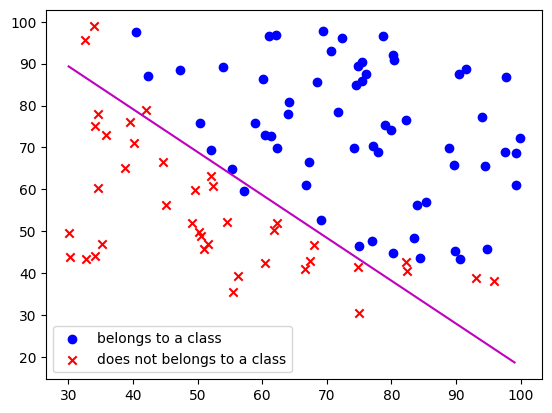

In [233]:
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')
plt.scatter(X[1][belongs], X[2][belongs], color='blue', marker='o', label='belongs to a class')
plt.scatter(X[1][not_belongs], X[2][not_belongs], color='red', marker='x', label='does not belongs to a class')
plt.legend()
plt.show()

### Admission dataset - nonlinear fitting

import dataset with polynomial covalues

In [234]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

rescale data for better output

In [235]:
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min.shape = [X_min.shape[0], 1]
X_normalized = (X -  X_min)/(X_max-X_min)
X_normalized[0] = np.ones([1, x1.shape[1]])
delta = 0.1

fit nonlinear decision boundary to the dataset

In [236]:
warnings.filterwarnings('ignore')
eps = 1e-10 # acceptable difference
#  in logistic regression key is to find good learning rate, 
# in sigmoidal function bigger rate found better match in this case
alpha = 0.1
theta = np.array([[0], [0], [0], [0]])
cost_before = 0
current_cost = 1000
count = 0
max_iterations = 200000 # essential to add there
cost_diff_before = np.Inf
cost_diff = abs(current_cost-cost_before)

for i in range(max_iterations): # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost(X_normalized, y, theta)
    h_y_diff = (h_fun(X_normalized, theta) - y)
    gradient = h_y_diff @ X_normalized.T
    if cost_diff_before > cost_diff:
        theta = theta - alpha * gradient.T / X_normalized.shape[-1]
    elif cost_diff < cost_diff_before:
        alpha *= 0.9
        theta = theta + alpha * gradient.T / X_normalized.shape[-1]
    current_cost = calculate_cost(X_normalized, y, theta)
    count +=1
    cost_diff_before = cost_diff
    cost_diff = abs(current_cost-cost_before)
    if ((count > max_iterations) or (cost_diff < eps)):
        break

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}, {np.round(theta[2], 5)}, {np.round(theta[3], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost

number of iterations:  200000
Theta values: [-15.12068], [34.08867], [14.6094], [-19.6751]
cost: 0.14958


vizualize nonlinear fitting

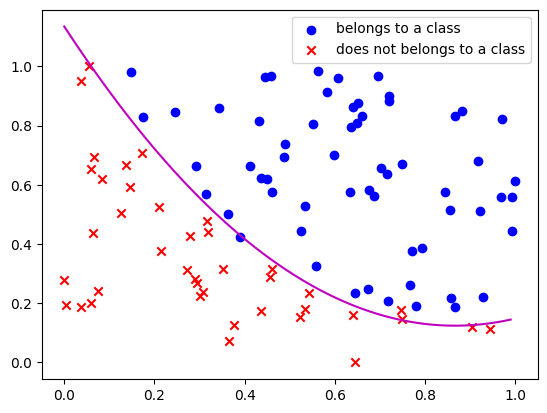

In [237]:
X = X_normalized
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 0.01)
x2_db = -theta[0, 0]/theta[2, 0] + delta - theta[1, 0]/theta[2, 0]*x1_db - theta[3,0]/theta[2,0]*x1_db**2
plt.plot(x1_db, x2_db, '-m')
plt.scatter(X[1][belongs], X[2][belongs], color='blue', marker='o', label='belongs to a class')
plt.scatter(X[1][not_belongs], X[2][not_belongs], color='red', marker='x', label='does not belongs to a class')
plt.legend()
plt.show()

### Digit recognition using logistic regression

import dataset and glimpse on the structure of data inside

In [238]:
from sklearn import datasets
 
data = datasets.load_digits()
y = data['target']
x = data['data']

print(x.shape)
print(y.shape)


(1797, 64)
(1797,)


split dataset between training and test part

In [239]:
from sklearn.model_selection import train_test_split
 
x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

# learning data size
m = x.shape[0]
# test data size
n = x_test.shape[1]
o = x_test.shape[0]

model learning

In [240]:
theta = []  # kontener na wagi kolejnych modeli
eps = 1e-1
alpha = 1e-1
no_of_cls = 10
x_scale=x.max()

for cls_id in range(no_of_cls):
    print(f'Optimalization for class {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x_scale  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1)) 
 
    cost_before = calculate_cost(X_cls, y_cls, theta_cls)
    iters = 0
    while True:
        # theta optimalization
        h_y_diff = (h_fun(X_cls, theta_cls) - y_cls)
        gradient = h_y_diff @ X_cls.T
        theta_cls = theta_cls - alpha * gradient.T / m
        
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        if ((math.fabs(prev_cost - current_cost) < eps) or iters>100000):
            break
        cost_before = current_cost
        iters += 1
    print(f'Cost for class {cls_id}: {current_cost}.')
    theta.append(theta_cls)

Optimalization for class 0
Cost for class 0: 0.001568183416788274.
Optimalization for class 1
Cost for class 1: 0.025816274561637934.
Optimalization for class 2
Cost for class 2: 0.0026265902128774655.
Optimalization for class 3
Cost for class 3: 0.01940152102576301.
Optimalization for class 4
Cost for class 4: 0.0035746336539549356.
Optimalization for class 5
Cost for class 5: 0.008737597464939944.
Optimalization for class 6
Cost for class 6: 0.0037339259555936493.
Optimalization for class 7
Cost for class 7: 0.007691912355042232.
Optimalization for class 8
Cost for class 8: 0.05869878692401463.
Optimalization for class 9
Cost for class 9: 0.028679889346374235.


evauation prototype

In [241]:
probabs = np.zeros((no_of_cls, o))
for cls_id, theta_cls in enumerate(theta):
    x_example = np.array(x_test) / x_test.max()
    X_example = np.concatenate([np.ones((1,o)), x_example.T])
    probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
pred = np.argmax(probabs, axis=0)

Evaluation for every example. Confusion matrix

In [243]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, pred)

positive_pred = confmat.diagonal()  / confmat.sum(axis=0) # calculate positive predictions of model
sensitivity = confmat.diagonal()  / confmat.sum(axis=1) # calculate sensitivity for data

print("Confusion matrix:")
print(confmat)

print("\nReport:")
print("cls | se | pp")  # senisitivity and number of good predictions
for i in range(len(sensivity)):
    print(" {} | {:.{}f} | {:.{}f}".format(i, sensivity[i], 2, positive_pred[i], 2))
    

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  1  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 0  1  0  0 49  0  0  1  1  0]
 [ 0  0  0  0  0 48  1  0  0  0]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  1  1  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  1  2 41]]

Report:
cls | se | pp
 0 | 1.00 | 1.00
 1 | 0.95 | 0.92
 2 | 1.00 | 0.98
 3 | 0.96 | 0.98
 4 | 1.00 | 1.00
 5 | 0.95 | 0.98
 6 | 1.00 | 0.96
 7 | 0.92 | 0.95
 8 | 0.93 | 0.91
 9 | 0.94 | 1.00
